In [8]:
#CELL-NO: 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

print ("All imports succesful")

All imports succesful


In [9]:
#CELL-NO: 2
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
              n_redundant=5, random_state=42)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create AdaBoost classifier with decision stumps
ada_classifier = AdaBoostClassifier(
      estimator=DecisionTreeClassifier(max_depth=1), # Decision stump
      n_estimators=50,
      learning_rate=1.0,
      random_state=42
)

# Train the model
ada_classifier.fit(X_train, y_train)
print("model training with adaboost successful")

model training with adaboost successful


In [10]:
#CELL-NO: 3
# Make predictions
y_pred = ada_classifier.predict(X_test)

# Evaluate performance
print("AdaBoost Classification Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

AdaBoost Classification Results:
Accuracy: 0.8200

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       106
           1       0.80      0.82      0.81        94

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



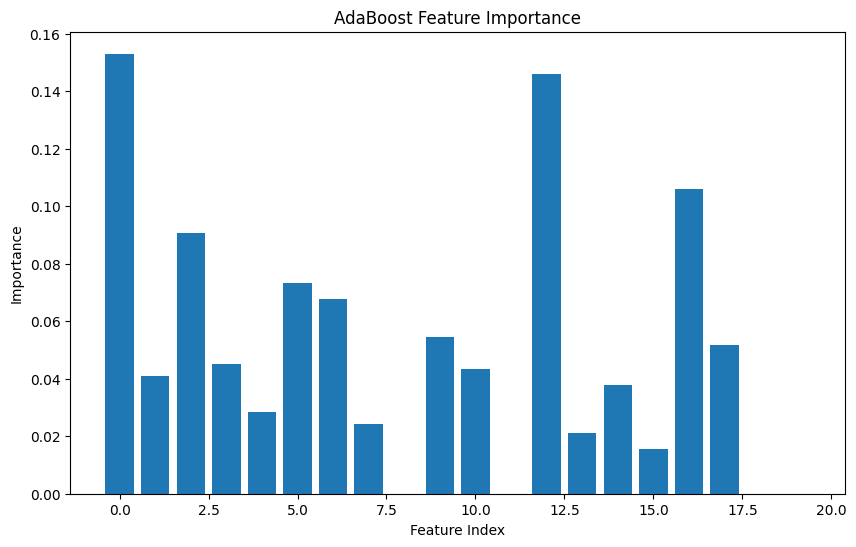

In [11]:
#CELL-NO: 4
# Visualize feature importance
feature_importance = ada_classifier.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('AdaBoost Feature Importance')
plt.show()

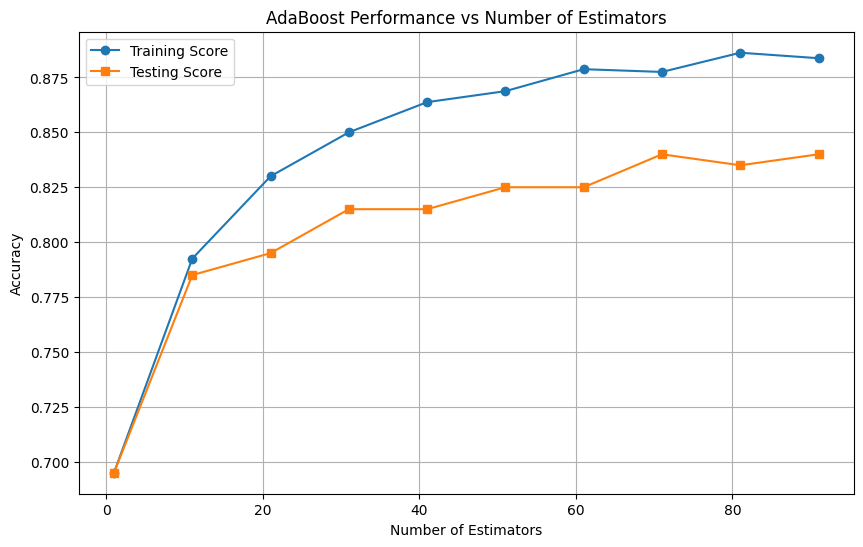

In [12]:
#CELL-NO: 5
# Study the effect of number of estimators
estimator_range = range(1, 101, 10)
train_scores = []
test_scores = []

for n_est in estimator_range:
  ada_temp = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=n_est,
    random_state=42
  )
  ada_temp.fit(X_train, y_train)
  train_scores.append(ada_temp.score(X_train, y_train))
  test_scores.append(ada_temp.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(estimator_range, train_scores, label='Training Score', marker='o')
plt.plot(estimator_range, test_scores, label='Testing Score', marker='s')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Performance vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()